In [178]:
#importing the libraries
import os
os.environ["OMP_NUM_THREADS"] = '1'
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans


In [179]:
data = pd.read_csv(r'C:\Users\DELL\Desktop\projects\Mall_customer_clustering/Mall_Customers.csv')


In [180]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [181]:
data.rename(columns={'Annual Income (k$)':'Annual Income','Spending Score (1-100)':'Spending Score'},inplace=True)

In [182]:
data.describe()

,CustomerID,Age,Annual Income,Spending Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [183]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual Income   200 non-null    int64 
 4   Spending Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


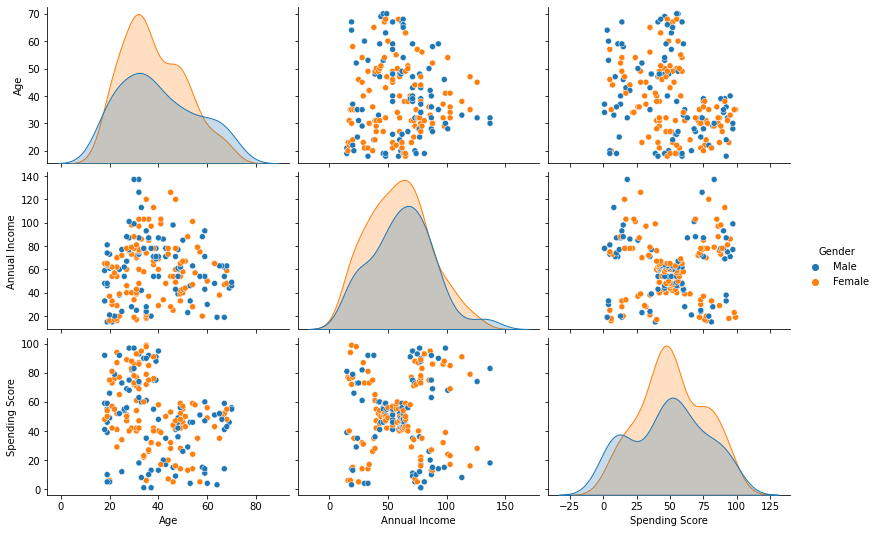

In [184]:
#creating a pairplot 
sns.pairplot(data.drop('CustomerID', axis=1), hue='Gender', aspect=1.5)
plt.show()

We can see that the datapoints are evenly distributed regardless of the gender, 
thus we can drop the gender column, along with the customer_id

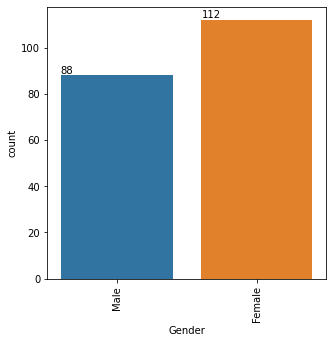

In [213]:
#Analysis on the basis of Gender
plt.figure(figsize = (5,5))
gender = data['Gender'].sort_values(ascending = False)
ax = sns.countplot(x='Gender', data= data)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation=90)
plt.show()

In [185]:
#dropping Customer ID and Gender
x=data.drop(['CustomerID','Gender'],axis=1)

<AxesSubplot:xlabel='Annual Income', ylabel='Spending Score'>

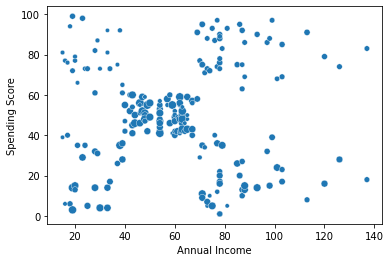

In [186]:
#creating a scatterplot to see the distribution of data
sns.scatterplot(data=x,x=x['Annual Income'],y=x['Spending Score'],s=x.Age )

# K-Means Clustering Algorithm

In [187]:
#trying to find the optimal value of k
from sklearn.cluster import KMeans
clusters = []
for i in range(1, 11):
    km = KMeans(n_clusters=i,init ='k-means++', max_iter=300,  n_init=10,random_state=0 )
    km.fit(x)
    clusters.append(km.inertia_)

Inertia: Intuitively, inertia tells how far away the points within a cluster are. 
    
   Therefore, a small of inertia is aimed for. 
    
   The range of inertia’s value starts from zero and goes up.

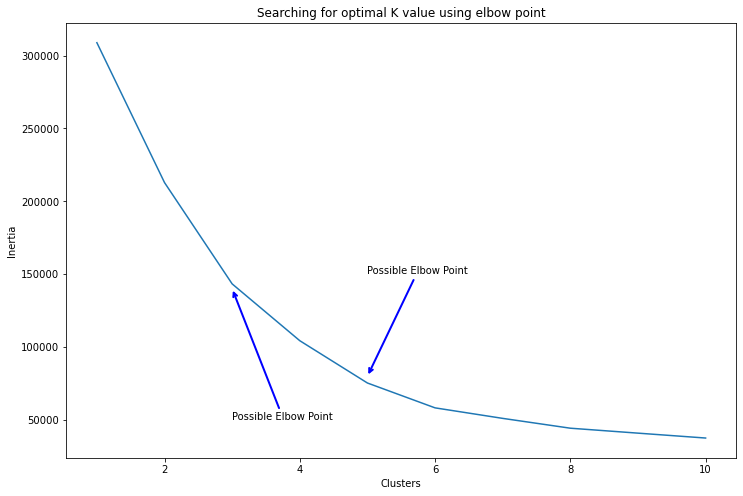

In [188]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Searching for optimal K value using elbow point')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

ax.annotate('Possible Elbow Point', xy=(3, 140000), xytext=(3, 50000), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

ax.annotate('Possible Elbow Point', xy=(5, 80000), xytext=(5, 150000), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

plt.show()

A good model is one with low inertia AND a low number of clusters (K). 
However, this is a tradeoff because as K increases, inertia decreases.

To find the optimal K for a dataset, use the Elbow method;
find the point where the decrease in inertia begins to slow. 
As we can in the graph above, there are two possible elbow points
K=2 and k=4 are the potential “elbow” of this graph.

### Fitting the model using k=3

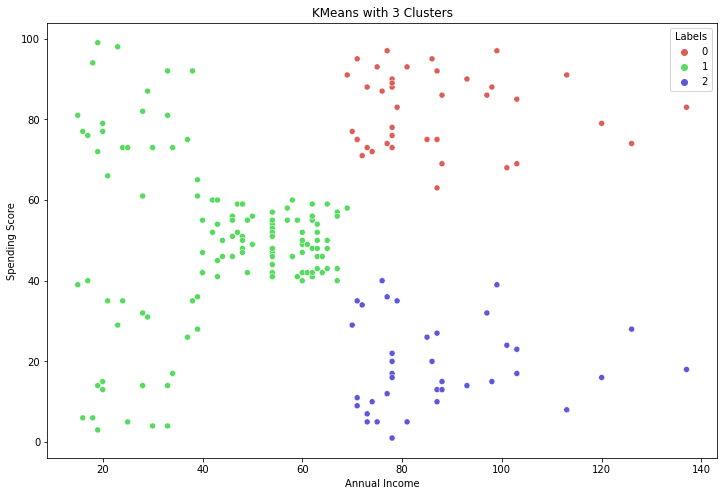

In [189]:
km2 = KMeans(n_clusters=3).fit(x)

x['Labels'] = km3.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(x=x['Annual Income'],y= x['Spending Score'], hue=x['Labels'], 
                palette=sns.color_palette('hls', 3))
plt.title('KMeans with 3 Clusters')
plt.show()

### Fitting the model using k=5

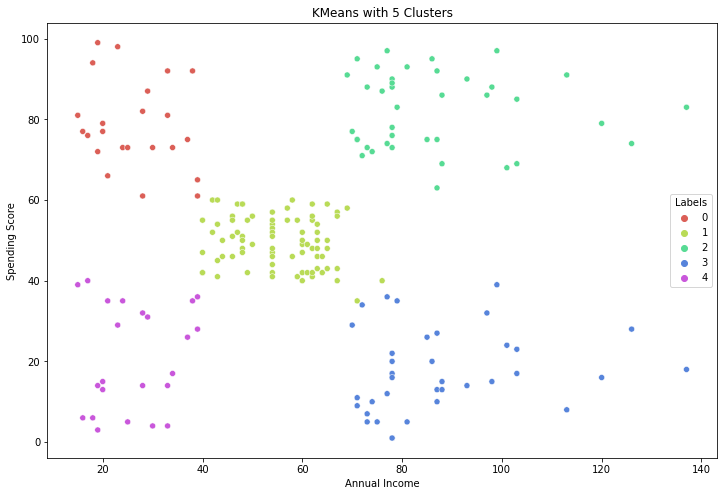

In [190]:
km4 = KMeans(n_clusters=5).fit(x)

x['Labels'] = km4.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(x=x['Annual Income'],y= x['Spending Score'], hue=x['Labels'], 
                palette=sns.color_palette('hls', 5))
plt.title('KMeans with 5 Clusters')
plt.show()

As we can see here there are 5 distinct clusters:
    
    Cluster 0 is low income and low spending
    
    Cluster 1 is high income and high spending
    
    Cluster 2 is mid income and mid spending
    
    Cluster 3 is high income and low spending
    
    Cluster 4 is low income and high spending

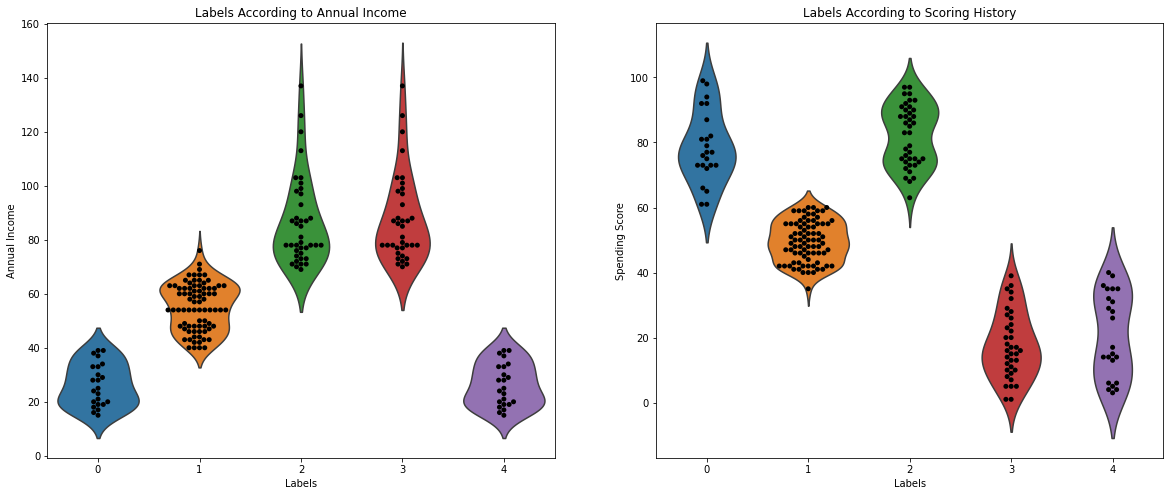

In [191]:
fig = plt.figure(figsize=(20,8));
ax = fig.add_subplot(121)
sns.violinplot(x='Labels', y='Annual Income', data=x, ax=ax,
 inner=None,alpha=0.5);
sns.swarmplot(x='Labels', y='Annual Income', data=x, ax=ax,color='black');
ax.set_title('Labels According to Annual Income')

ax = fig.add_subplot(122);
sns.violinplot(x='Labels', y='Spending Score', data=x, ax=ax,
 inner=None);
sns.swarmplot(x='Labels', y='Spending Score', data=x, ax=ax,color='black');
ax.set_title('Labels According to Scoring History')

plt.show()

In [198]:
from sklearn.metrics import silhouette_samples, silhouette_score
# Calculate Silhoutte Score
score = silhouette_score(x, km3.labels_, metric='euclidean')
# Print the score
print('Silhouette Score: %.3f' % score)


Silhouette Score: 0.384


# Hierarchical Clustering

###  Constructing a Dendogram

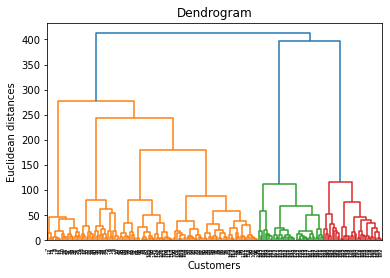

In [193]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(x, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()


To determine the optimal number of clusters from a diagram with customers on the x-axis and Euclidean distance between clusters on the y-axis, we need to look for the highest vertical distance that doesn't intersect any horizontal line. In the provided diagram, the red-framed line represents this distance, and by counting the number of horizontal lines on the diagram, we can determine the optimal number of clusters, which is 5 in this case.





### Agglomerative Clustering

Agglomerative clustering is a hierarchical clustering technique used in machine learning and data analysis. It involves grouping similar data points together to form clusters, which are then combined into larger clusters until all the data points belong to a single cluster.


##### The Agglomerative Clustering class will require two inputs:

-> n_clusters: The number of clusters to form as well as the number of centroids to generate.

-> linkage: Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion.

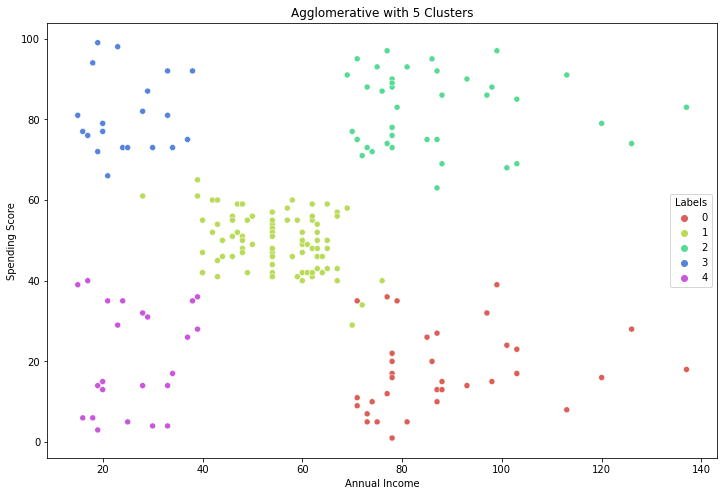

In [194]:
from sklearn.cluster import AgglomerativeClustering 

agglom = AgglomerativeClustering(n_clusters=5, linkage='average').fit(x)

x['Labels'] = agglom.labels_

plt.figure(figsize=(12, 8))
sns.scatterplot(x=x['Annual Income'],y= x['Spending Score'], hue=x['Labels'], 
                palette=sns.color_palette('hls', 5))
plt.title('Agglomerative with 5 Clusters')
plt.show()

In [199]:
# Calculate Silhoutte Score
score = silhouette_score(x, agglom.labels_, metric='euclidean')
# Print the score
print('Silhouette Score: %.3f' % score)


Silhouette Score: 0.441


# Density Based Clustering (DBSCAN)


DBSCAN is an acronym for Density-Based Spatial Clustering of Applications with Noise. This clustering technique is widely used and relies on the density of objects. Essentially, the algorithm identifies clusters based on the notion that if a data point belongs to a cluster, it should be close to many other points in that same cluster.

To accomplish this, the algorithm relies on two key parameters: Epsilon and Minimum Points. Epsilon defines a specific radius within which a sufficient number of points are present, thereby indicating a dense area. Minimum Points determines the minimum number of data points required within a given radius to define a cluster.

In [196]:
## lets apply min-max scaling to each row
# define our scaler
scaler = StandardScaler()

# scale down our data
x_scaled = scaler.fit_transform(x)

# see here four rows that are scaled
print(x_scaled[0:4])

[[-1.42456879 -1.73899919 -0.43480148  1.997664  ]
 [-1.28103541 -1.73899919  1.19570407  1.1772681 ]
 [-1.3528021  -1.70082976 -1.71591298  1.997664  ]
 [-1.13750203 -1.70082976  1.04041783  1.1772681 ]]


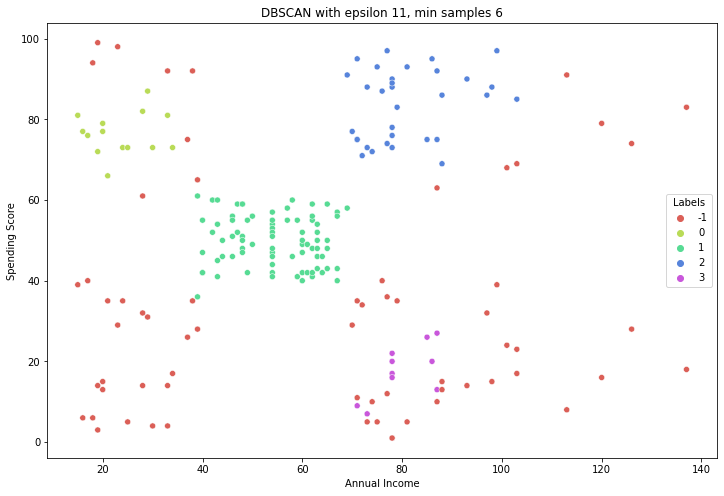

In [203]:
from sklearn.cluster import DBSCAN 

dbscan = DBSCAN(eps=11, min_samples=6).fit(x)

x['Labels'] = dbscan.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(x=x['Annual Income'],y= x['Spending Score'], hue=x['Labels'], 
                palette=sns.color_palette('hls', np.unique(dbscan.labels_).shape[0]))
plt.title('DBSCAN with epsilon 11, min samples 6')
plt.show()


As we can see DBSCAN doesn't perform very well because the density in our data is not that strong. Label -1 means outliers so it will appear most as outliers. We may have performed better if we had had a bigger data.



## Mean Shift algorithm

The Mean Shift algorithm is a clustering technique that operates by iteratively shifting data points towards the mode or the maximum density of the underlying probability density function. The basic idea is to start with an initial centroid or seed point and shift it towards the direction of the highest increase in density until convergence is reached.

The algorithm can be used for both density estimation and clustering. In the case of clustering, the mode or density peak that each point converges towards determines its cluster assignment. This process continues until no more shifts are possible, and each point is assigned to its respective cluster.

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass bandwidth=22.21702645600276 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


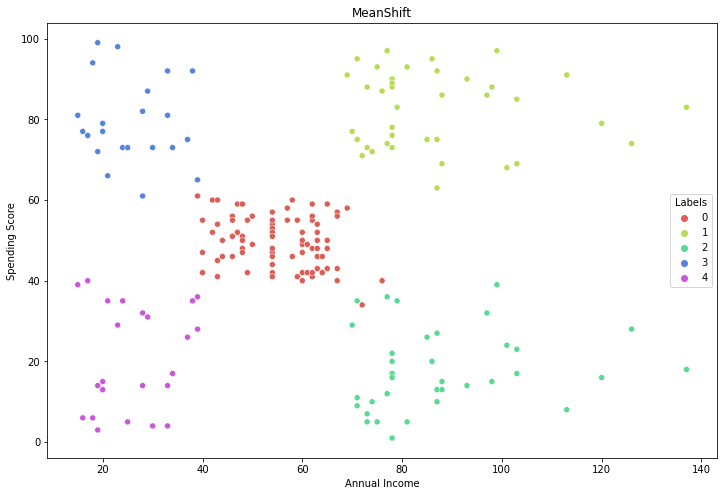

In [206]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# The following bandwidth can be automatically detected using
bw = estimate_bandwidth(x, quantile=0.1)
meanshift = MeanShift(bw).fit(x)

x['Labels'] = meanshift.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(x=x['Annual Income'],y= x['Spending Score'], hue=x['Labels'], 
                palette=sns.color_palette('hls', np.unique(meanshift.labels_).shape[0]))
plt.plot()
plt.title('MeanShift')
plt.show()

In [208]:
# Calculate Silhoutte Score
score = silhouette_score(x, meanshift.labels_, metric='euclidean')
# Print the score
print('Silhouette Score: %.3f' % score)


Silhouette Score: 0.445
